In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing

In [3]:
def generate(n, low=0, high=10):
    return np.random.uniform(low, high, size=(n, 2))

In [4]:
def dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

def dist_matrix(points):
    n = len(points)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            matrix[i, j] = dist(points[i], points[j])
            matrix[j, i] = matrix[i, j]
    return matrix

def swap_neighbour(tour):
    i = np.random.choice(len(tour))
    j = (i+1)%len(tour)
    new_tour = tour.copy()
    new_tour[[i,j]] = new_tour[[j,i]] 
    return new_tour

def swap_random(tour):
    i, j = np.random.choice(len(tour), 2, replace=False)
    new_tour = tour.copy()
    new_tour[[i,j]] = new_tour[[j,i]] 
    return new_tour

def tour_length(tour):
    length = 0
    for i in range(len(tour)):
        length += dist(tour[i], tour[i-1])
    return length

In [5]:
def annealing(points, temp=0.99, step=0.98, p=0.5, max_iter=1000):
    n = len(points)
    tour = np.random.permutation(points)
    best_tour = tour
    best_length = tour_length(tour)
    nochange = 0
    for _ in range(max_iter):
        new_tour = swap_neighbour(tour)
        new_length = tour_length(new_tour)
        if new_length < best_length or p < (abs(best_length - new_length)/new_length):
            best_tour = new_tour
            best_length = new_length
            nochange = 0
        else:
            nochange += 1
            if nochange > 50:
                break
        tour = new_tour
        temp *= step
    return best_tour, best_length

In [6]:
#print(annealing(generate(10)))

In [25]:
def annealing_plot(points, swapper, temp=0.99, step=0.95, p=0.8, max_iter=100000):
    fix, axis = plt.subplots(1, 3, figsize=(15, 5))
    data = {"i":[], "best":[], "length":[], "temp":[]}
    n = len(points)
    tour = np.random.permutation(points)
    best_tour = tour
    best_length = tour_length(tour)
    nochange = 0
    for i in range(max_iter):
        new_tour = swapper(tour)
        new_length = tour_length(new_tour)
        if new_length < best_length:
            best_tour = new_tour
            best_length = new_length
            nochange = 0
        else:
            nochange += 1
            if nochange > 50:
                print(f"nochange in {i} iteration")
                break
        data["i"].append(i)
        data["length"].append(new_length)
        data["best"].append(best_length)
        data["temp"].append(temp)
        tour = new_tour
        temp *= step
    print("end")
    axis[0].plot(data["i"], data["length"])
    axis[0].set_xlabel("Iteration")
    axis[0].set_ylabel("Length")
    axis[0].set_title("Length")
    axis[1].plot(data["i"], data["temp"])
    axis[1].set_xlabel("Iteration")
    axis[1].set_ylabel("Temp")
    axis[1].set_title("Temp")
    axis[2].plot(data["i"], data["best"])
    axis[2].set_xlabel("Iteration")
    axis[2].set_ylabel("Best")
    axis[2].set_title("Best")
    plt.show()

nochange in 122 iteration
end


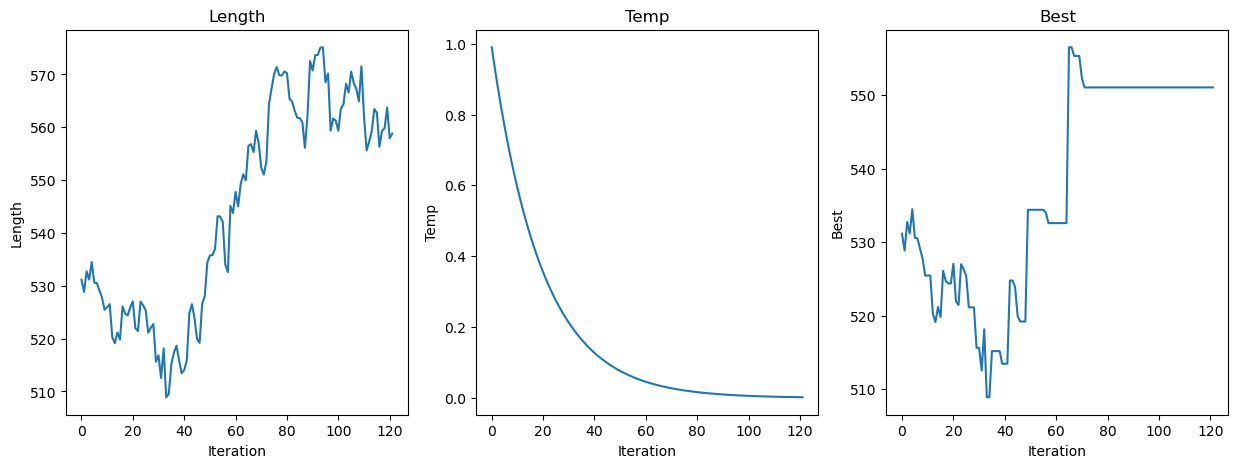

nochange in 176 iteration
end


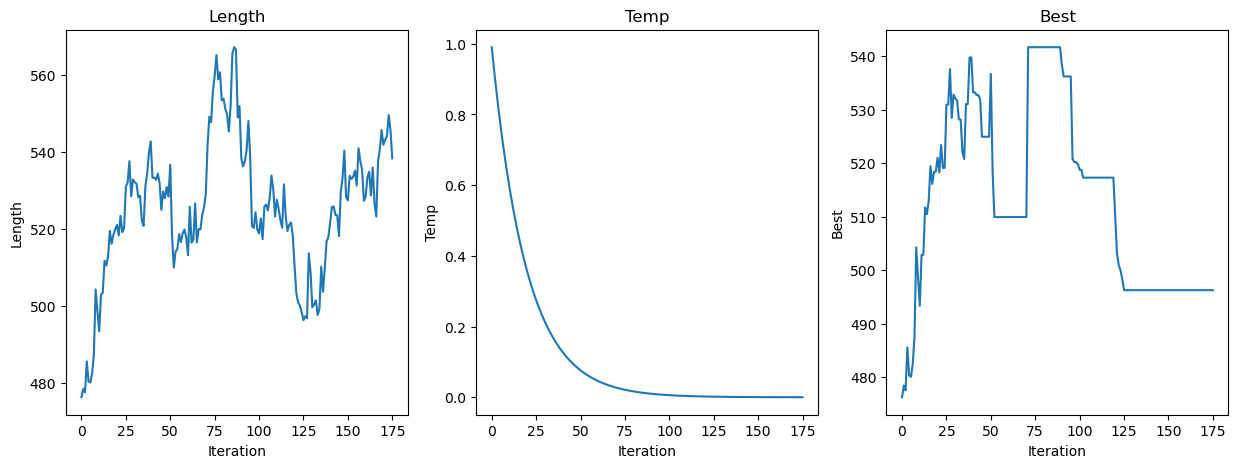

In [26]:
annealing_plot(generate(100), swap_neighbour)
annealing_plot(generate(100), swap_random)

nochange in 88 iteration
end


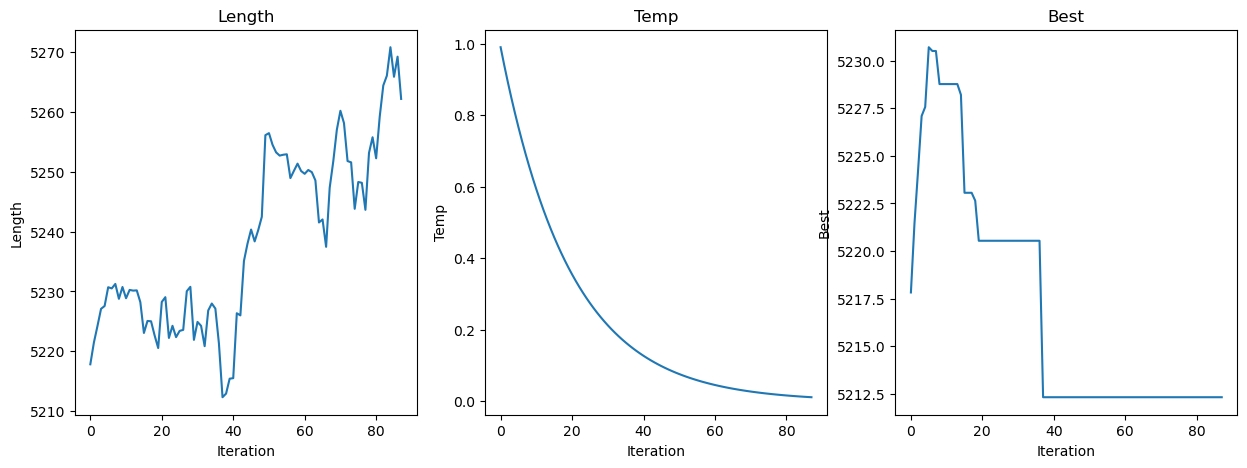

nochange in 76 iteration
end


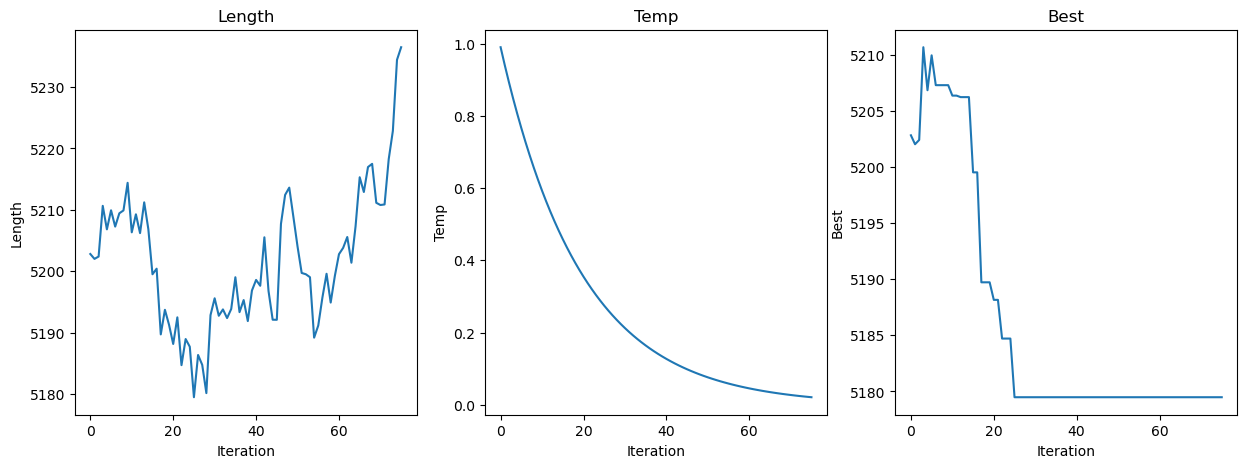

In [9]:
annealing_plot(generate(1000), swap_neighbour)
annealing_plot(generate(1000), swap_random)